# Turorial on Analyzing Network Datasets

# Introduction 
This tutorial intends to help you learn how to analyze and visualize network datasets, as well as introducing applications of such visualization. Lots of data is represented by networks: social communities, roads, processes, etc. Even though network science can be very involved and quite independent on its own, lots of topics in data science and machine learning use network analysis and visualization intensively. 

## Tutorial Content
In this tutorial, we will show how to do some basic spatial analysis in Python, specifically using [NetworkX](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf) and [GraphViz](https://graphviz.org/documentation/).

We will cover the following topics in this tutorial:
* [Installing the libraries](#Install)
* [Basics about NetworkX](#basics)
* [Analyze network data using NetworkX](#analyze)
* [Visualizing data by GraphViz](#visualize)
* [Visualizing decition trees](#dt)
* [Visualizing neural networks](#neural)
* [Summary and references](#summary)

<a id='install'></a>
# Installing the libraries
This tutorial will use NwtworX, GraphViz, and Matplotlib. Install the libraries using the `pip` command:

`$  pip install networkx`

`$  pip install graphviz`

`$  pip install matplotlib`

In [1]:
import networkx
import matplotlib.pyplot as plt
import random
from graphviz import Source

<a id='basics'></a>
# Basics about NetworkX
NetworkX is a common tool to use for studying [graphs](https://en.wikipedia.org/wiki/Graph_(abstract_data_type)) and [networks](https://en.wikipedia.org/wiki/Network_science). After initializing a graph, you can add nodes and edges to the graph. Each node has an identifier and can have additional corresponding attributes attached to it.
Anything **hashable** can be a node identifier and anything can be an **attribute**, even functions! So if your node identifier's data structure is not hashable, simply assign it as an attribute. 

You can add or delete nodes one at a time or use lists to add multiple nodes at one time. Edges can be modified similarly. Notice that `networkx.Graph()` creates an undirected graph. Use `networkx.DiGraph()` to initialize a directed graph and `MultiGraph`, `MultiDigraph` for other types of graphs. 

Attributes are sometimes essential to network data analysis since they may contain important information about the nodes and the edges. You are able to attach attributes when defining the nodes and modify them later using `set_node_attributes`.

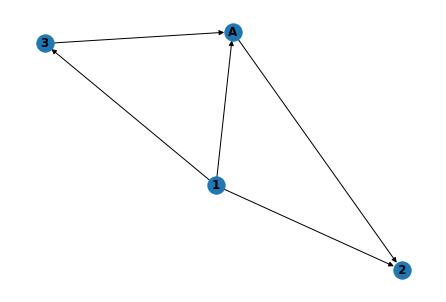

In [171]:
G = networkx.DiGraph() # Creates a directed graph

# Add nodes one at a time or using a list
G.add_node(1)
nodes_list = [(2, {"color": "blue", "size" : 5}), # Use a dictionary to include attributes
              ("A", {"color": "red", "size": 7})] # Color here is an attribute and the nodes do not actually 
                                                  # have different colors when we plot the network
G.add_nodes_from(nodes_list)  

# Add edges 
G.add_edge(1, 2)
edges_list = [("A", 2), (3, "A"), (1, 3), (1, "A")]
G.add_edges_from(edges_list)
networkx.draw(G, with_labels=True, font_weight='bold')

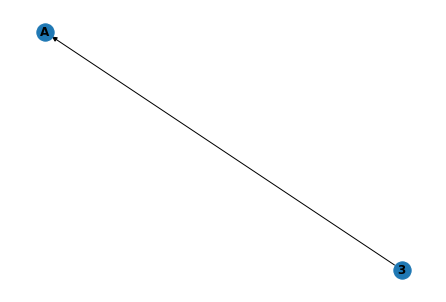

In [172]:
# Remove nodes or edges
G.remove_node(1)
G.remove_nodes_from([2])
networkx.draw(G, with_labels=True, font_weight='bold')

Despite creating a graph from sketch, you can also combine multiple graphs into one single graph by copying nodes and edges, as shown below:

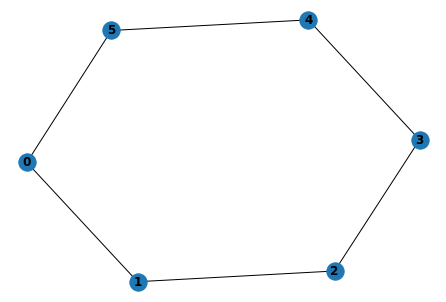

In [173]:
H = networkx.cycle_graph(6)  # Creates a undirected cycle graph with 6 nodes
networkx.draw(H, with_labels=True, font_weight='bold')

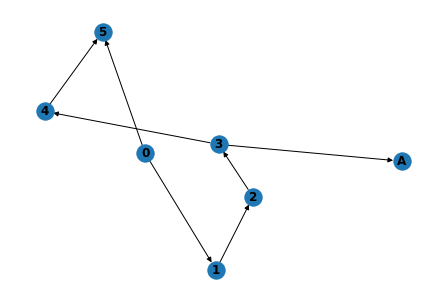

In [175]:
G.add_nodes_from(H)
G.add_edges_from(H.edges) # G now has H's nodes and edges 
networkx.draw(G, with_labels=True, font_weight='bold')

After creating the graph, it is convenient to inspect the properties of the graph using builtin methods in `NetworkX`.
* `G.nodes` returns the nodes in G as an object.
* `G.edges` returns the list of edges in G as an object.
* `G.adj` returns the adjacency matrix in the form of a nested disctionary.
* `G.degree` returns a dictionary representing the sum of indegree and outdegree of each node.

<a id='analyze'></a>
# Analyze network data using NetworkX
`NetworkX` is useful when it comes to analyzing networks and random graphs. For instance, you can inspect the degree distribution of your network. Below demonstrates the degree distribution for a random graph under [Erdos Renyi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model), where for a fixed vertex set, each edge has a fixed probability of being present or absent, independently of the other edges. 

The degree distribution:


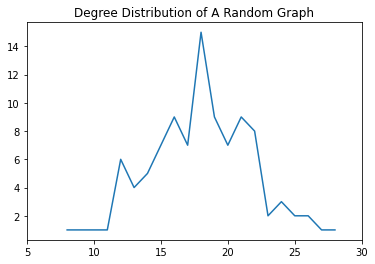

In [292]:
random.seed(15388)
rand_graph = networkx.erdos_renyi_graph(100, 0.2) # Generates a random graph under Erdos Renyi model 
# with 100 nodes and the probability of having an edge between two nodes being 0.2

in_degrees = {node: degree for (node, degree) in rand_graph.degree}
in_values = sorted(set(in_degrees.values()))
num = [list(in_degrees.values()).count(x) for x in in_values]

plt.figure() 
plt.title('Degree Distribution of A Random Graph')
plt.xlim([5, 30])
plt.plot(in_values, num) 
print("The degree distribution:")

The degree distribution above seems to form a binomial distribution, which aligns with the property of Erdos Renyi graphs. The library also includes a lot of builtin functions to help you obtain information that is usually not very obvious when simply visualizing the network or the degree distribution. Here are some examples of finding the most central node in the network. **Centrality** of a node identifies how "important" that node is within the network. There are several centrality indicators:  
* **Betweenness centrality** quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 
* **Closeness centrality** measures how close a node is to all other nodes. It is calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. 
* **Eigenvector centrality** indicates the influence of a node in a network. A high eigenvector centrality means that a node is connected to many nodes that also have high scores.

Given a graph with a large number of nodes and edges, centrality is very useful to help us identify important nodes. For instance, big airports such as Chicago O'Hare Airport and Dubai International Airport will have high centrality in the global airplane route network.  

As you see below, for the random graph we generated before, node 87 and 35 are considered the most central or important node. Note that different measures may not necessarily agree on which node is most central and you should always choose which measure to use based on the significance behind the measure.

In [107]:
deg_cent = networkx.degree_centrality(rand_graph)
close_cent = networkx.closeness_centrality(rand_graph)
eig_cent = networkx.eigenvector_centrality(rand_graph)

deg = max(deg_cent, key=deg_cent.get)
close = max(close_cent, key=close_cent.get)
eig = max(eig_cent, key=eig_cent.get)

(deg, close, eig) # The most "central" nodes calculated under three measures

(87, 35, 87)

Now we can move on to visualizing the data. `Matplot` is used here to help generate the plot. Below is a demonstration on how to plot the [Petersen Graph](https://en.wikipedia.org/wiki/The_Petersen_Graph), a special graph with unusual mathematical properties and has frequently been used as a counterexample to conjectures in graph theory.

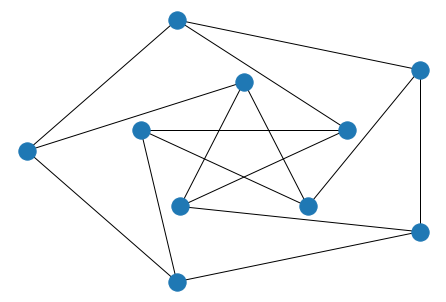

In [303]:
G = networkx.petersen_graph()
networkx.draw_shell(G, nlist=[range(5, 10), range(0, 5)])

While `NetworkX` could be used to visualize network datasets, the library is not primarily designed to visualize network datasets (as you may see from the less than ideal picture shown above). It is particularly limited in visualizing large datasets. 

<a id='visualize'></a>
# Visualizing data by GraphViz

Let's now look at `GraphViz` which visualizes network data much better. `Graphviz` (short for graph visualization software) is a tool that translates descriptions of graphs in the DOT language into images.

### The DOT language 
As mentioned before, `GraphViz` uses DOT, a simple language that represents graphs. In this tutorial, the `Source` package is used. To create a source object, you need to define the type of the graph (such as `graph`, `digraph`, etc.) and then use a {} bracket to include the nodes and edges. For instance, `graph "hello" {1 -- 2; 2 -- 3; 3 -- 4;}` denotes a undirected path graph with three nodes and a name "hello". Note that since we have already included the names of the nodes when defining the edges, there's no need to explicitly define the nodes.


### Source V.S. Graph

There are two ways to use GraphViz to plot graphs: 
* Editing the source object directly in DOT (which you see in this tutorial). A `Source` object will be returned.
* Or, use the builtin methods in the `Graph` package which let the underlying library process DOT. A `Graph` object will be returned instead. Please refer to [the user guide](https://graphviz.readthedocs.io/en/stable/manual.html) for basic usage and more details about the tool.

Both have the same effect but keep in mind that source objects are not interchangeable with graph objects within `GraphViz`. 

### GraphViz
We will first demonstrate how to plot network graphs using the [dolphin dataset](http://www-personal.umich.edu/~mejn/netdata/). The dataset includes an undirected social network of frequent associations between dolphins in a community living off Doubtful Sound, New Zealand. Intuitively, each node represents an individual dolphin and an edge represents the two dolphins have frequent associations. The dataset originally contains 62 dolphins. However, since `GraphViz` works better in smaller datasets, here we only use data of 15 dolphins. 

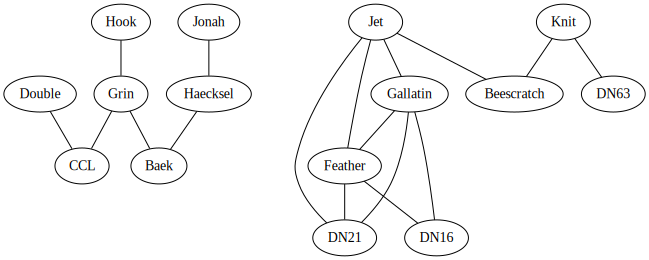

In [199]:
src = '''graph "Dolphins" {Double -- CCL; Feather -- DN16; Feather -- DN21; Gallatin --  DN16;
                           Gallatin --  DN21; Gallatin --  Feather; Grin  -- Baek; Grin -- CCL;
                           Haecksel -- Baek; Hook -- Grin; Jet -- Beescratch; Jet -- DN21;
                           Jet -- Feather; Jet -- Gallatin; Jonah -- Haecksel; Knit -- Beescratch;
                           Knit -- DN63;}'''
dolphin = Source(src)
dolphin

The graph is rendered nicely but there is no extra information shown other than dolphins' names and their social relationship. Most of the times you probably want your graphs to contain as much information as possible and you can do so by modifying the node/edge attributes in your source definition:

* Node attributes: add shape/color attributes in a bracket after the node's name at the beginning of the source object.
* Edge attributes: add a bracket containing color/edge width/ weight attributes behind the edge.

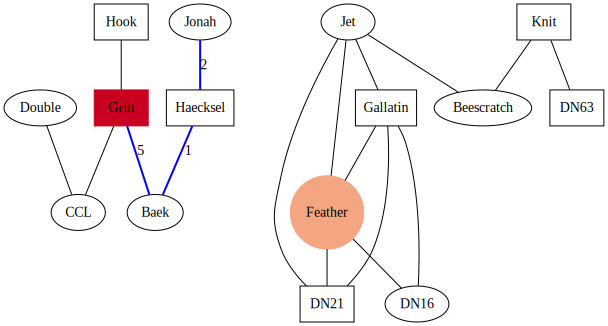

In [237]:
src_2 = '''graph "Dolphins" {Grin [style="filled"  colorscheme="rdbu5" color=1 shape=box];
                             Feather [style="filled"  colorscheme="rdbu5" color=2 shape=circle];
                             Hook [shape=box]; Haecksel [shape=box]; Gallatin [shape=box]; 
                             DN63 [shape=box]; Knit [shape=box]; DN21 [shape=box];
                             Double -- CCL; Feather -- DN16; Feather -- DN21; Gallatin --  DN16;
                             Gallatin --  DN21; Gallatin --  Feather; 
                             Grin  -- Baek [color=blue penwidth=2.0 label=5]; 
                             Haecksel -- Baek [color=blue penwidth=2.0 label=1]; 
                             Jonah -- Haecksel [color=blue penwidth=2.0 label=2];
                             Hook -- Grin; Jet -- Beescratch; Jet -- DN21;
                             Grin -- CCL; Jet -- Feather; Jet -- Gallatin;Knit -- Beescratch;
                             Knit -- DN63;}'''
dolphin_2 = Source(src_2)
dolphin_2

Now you can use different colors and node shapes to denote e.g. sex, age, breed, of dolphins! Moreover, you are able to add edge weights which in this case may represent something like the number of times the two dolphins interact with each other. 

If you prefer to use `graphviz.Graph` instead of editing the source object, you can change the attributes simply by calling `yourgraph.node('node name', 'node label', shape='egg', color=1)` which defines a new node with attributes, or `yourgraph.attr('node name', shape='star')` which fix the style for nodes defined following this line of code.

<a id='dt'></a>
# Visualizing decision trees
Since DOT draws hierarchical layouts of directed graphs, it is also widely used to plot hierarchical graphs like process graphs. Here I want to demonstrate another application of `GraphViz`: plotting decision trees, where data is ordered hierarchically in nature. 

Decision tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Leaves represent class labels and branches represent conjunctions of features that lead to those class labels. 

Here is an example of heart attack analysis using this [data](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). The datasets include age, sex, whether exercise is induced, type of chest pain, etc. Please refer to the link for a detailed explanation of each feature. `output` is 0 if the patient has a lower chance of getting a heart attack and is 1 if the patient has a higher chance of heart attack. We first load the data and then use `sklearn` to train the classifier.

In [113]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  
from sklearn import metrics 
from sklearn import tree

heart = pd.read_csv("heart.csv")
heart.head() # An overview of the features and their types

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
features = list(heart.columns)[:-1] # Column other than 'output' is considered a feature
classes = ['yes', 'no']
X = heart[features] 
y = heart.output 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15388) 

In [127]:
err_rate = {}
for max_depth in range(1, len(features)+1):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 1).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    err = 1 - metrics.accuracy_score(y_test, y_pred) # The error rate of our model
    err_rate[max_depth] = err

# Find the best model with the lowest error rate
best_depth = min(err_rate, key = err_rate.get)
best_model = DecisionTreeClassifier(max_depth = best_depth).fit(X_train,y_train)
print('The best model is with tree depth', best_depth, 'and an error rate of', err_rate[best_depth])

The best model is with tree depth 5 and an error rate of 0.16393442622950816


In [110]:
%%capture
tree.plot_tree(best_model) # Plot our decision tree 

<img src="files/bad.png" style="width: 500px;">

You could use the builtin `plot_tree` function to draw the decision tree. The output will be tiny with low resolution, as shown above. Alternatively, you could export the model to a .dot file and use `GraphViz` to generate a cleaner graph.

In [304]:
tree.export_graphviz(best_model,
                     out_file = "decision_tree.dot",
                     feature_names = features, 
                     class_names = classes)

In your current working directory, a .dot file will be created, with graph information written in DOT. Below is how the file will look like (only the first 20 lines are shown). 

<img src="files/dotfile.png" style="width: 600px;">

The file is 88 lines long and it's more efficient to convert it into a png directly. Open the terminal on your computer and type in the command: 

`dot -Tpng decision_tree.dot > tree.png`

A png of the decision tree will be generated. Feature criteria and decision steps are clearly shown.

<img src="files/output.png">

<a id='neural'></a>
# Visualizing neural networks

`GraphViz` can also used to visualize [neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network). The code below shows how to draw a 2 layer neural networks where the input has size 3 by 1, and the output is of size 4 by 1.

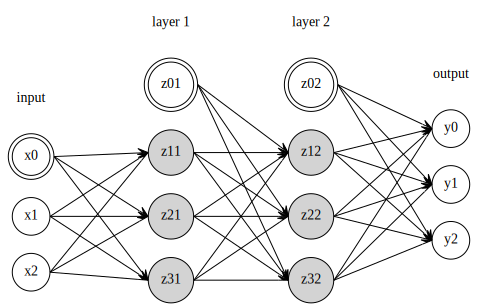

In [315]:
neural = '''digraph G {rankdir = LR; splines=false; ranksep= 1.2; edge[style=invis]; 
                       {node [shape=doublecircle];
                        x0 [label=<x<sub>0</sub>>]; 
                        z01 [label=<z<sub>0</sub><sup>1</sup>>]; 
                        z02 [label=<z<sub>0</sub><sup>2</sup>>];}
                       {node [shape=circle];
                        x1 [label=<x<sub>1</sub>>];
                        x2 [label=<x<sub>2</sub>>];}
                       {node [shape=circle, style=filled, fillcolor=lightgrey];
                        z11 [label=<z<sub>1</sub><sup>1</sup>>];
                        z21 [label=<z<sub>2</sub><sup>1</sup>>];
                        z31 [label=<z<sub>3</sub><sup>1</sup>>];
                        z12 [label=<z<sub>1</sub><sup>2</sup>>];
                        z22 [label=<z<sub>2</sub><sup>2</sup>>];
                        z32 [label=<z<sub>3</sub><sup>2</sup>>];}
                       {node [shape=circle];
                        y0 [label=<y<sub>0</sub>>];
                        y1 [label=<y<sub>1</sub>>]; 
                        y2 [label=<y<sub>2</sub>>];}
                       {rank=same; x0->x1->x2;}{rank=same; z01->z11->z21->z31;}
                       {rank=same; z02->z12->z22->z32;}{rank=same;y0->y1->y2;}

                       l0 [shape=plaintext, label="input"];
                       l1 [shape=plaintext, label="layer 1"];
                       l2 [shape=plaintext, label="layer 2"];
                       l3 [shape=plaintext, label="output"];
                       {rank=same; l0;x0}; {rank=same; l1;z01}; {rank=same; l2;z02}; {rank=same; l3;y0};
                       z01->z02; 
                       
                       edge[style=solid, arrowhead=halfopen, tailport=e, headport=w];
                       {x0; x1; x2} -> {z11;z21;z31};
                       {z01;z11;z21;z31} -> {z12;z22;z32};
                       {z02;z12;z22;z32} -> {y0,y1,y2};}
                       '''

Source(neural)

<a id='summary'></a>
# Summary and references
1. NetworkX: https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf
2. GraphViz: https://graphviz.org/documentation/
3. Decision trees: https://en.wikipedia.org/wiki/Decision_tree_learning
4. Heart attack data: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
5. Neural network: https://en.wikipedia.org/wiki/Artificial_neural_network